In [126]:
import pandas as pd
import csv
%matplotlib inline

### 1. how many total number of days does the flights table cover?

In [127]:
def operating_days_by_flight(file):
    """
        returns the total number of days covers in the flight dataset
        
    """
    # using panda's built-in method to read the csv file
    df_flight=pd.read_csv(file)
    
    # Multiple flights can be operated on the same day so considering the unique days covered by the flight
    return flights[['year','month','day']].drop_duplicates().count()['day']

operating_days_by_flight("flights.csv")
## Result- 365

365

### 2. how many departure cities (not airports) does the flights database cover?


In [128]:
def departure_cities(flights,airports):
    """
        returns the numbers of departure cities included in the dataset
    
    """
    
    # load the file in dataframe
    df_flight=pd.read_csv(flights)
    df_airports=pd.read_csv(airports)
    df_dep_city=df_flight.merge(df_airports,how='inner',left_on='origin',right_on='IATA_CODE')
    return df_dep_city.CITY.nunique()

departure_cities('flights.csv','airports.csv')
## Result - 2 

2

### 3. what is the relationship between flights and planes tables?

In [129]:
def flights_rel_planes(flights,planes):
    """ 
        returns the relationship between flight and plane
       
    """
    # load flight data into dataframe
    df_flights=pd.read_csv(flights)
    
    # load plane data into dataframe
    df_planes=pd.read_csv(planes)
    
    #list out all the columns in flight dataframe
    flight_cols=df_flights.columns.to_list()
    
    #list out all the columns in plane dataframe
    flight_cols=df_flights.columns.to_list()
    
    # returns the common columns present in both the lists(datasets)
    return set(flight_cols)&set(plane_cols)

flights_rel_planes("flights.csv","planes.csv")

## Result - {'tailnum','year'}

{'tailnum', 'year'}

### Additional work: Scatter plot to find out the relationship between tailnum and no of flights operated 

<AxesSubplot:xlabel='flight', ylabel='tailnum'>

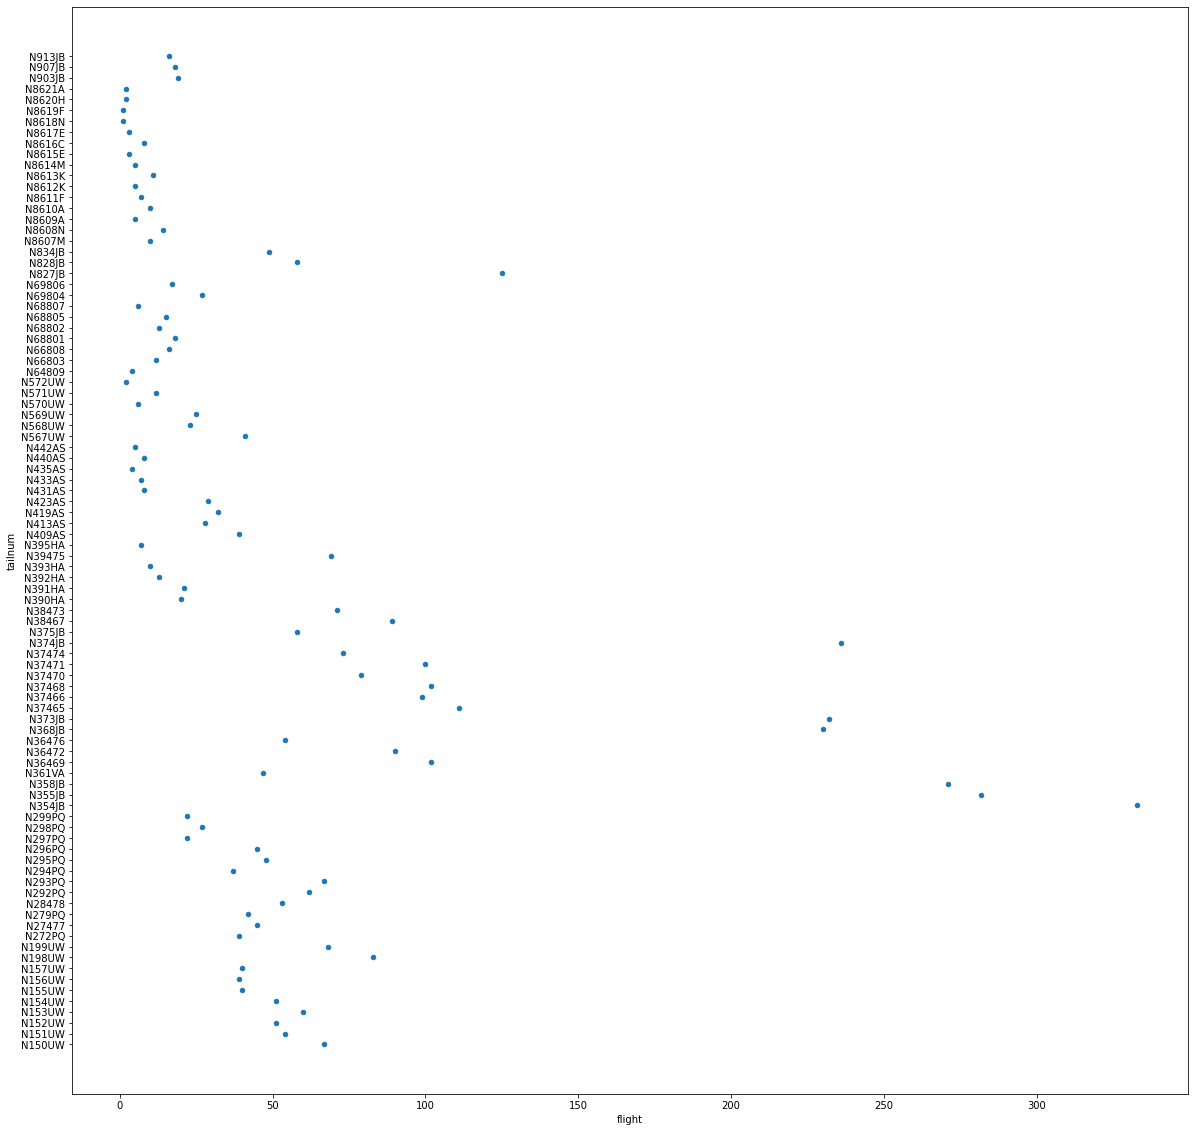

In [130]:
# joining two datasets
df_rel=df_flights.merge(df_planes,how='inner',on=['tailnum','year'])

# counting no of flights grouped by tailnum and year
df_rel_graph=pd.DataFrame(df_rel.groupby(['tailnum','year'])['flight'].count())
df_rel_graph.reset_index(level='tailnum',inplace=True)

# plot the scatter graph to find the relationship between two variables
df_rel_graph.plot.scatter('flight','tailnum',figsize=(20,20))

### 4. which airplane manufacturer incurred the most delays in the analysis period?

In [269]:
def delay_by_mf(flights,planes):
    
    """
       return the manufacturer who suffered the most delays
    
    """
    # load flight data into dataframe
    df_flights=pd.read_csv(flights)
    
    # load plane data into dataframe
    df_planes=pd.read_csv(planes)
    
    #join two datasets planes and flights
    df_mf=df_flights.merge(df_planes,how='inner',on=['tailnum','year'])
    
    #getting the total departure delay and arrival delay by manufacturer
    df_agg=df_mf.groupby('manufacturer')['dep_delay','arr_delay'].sum().reset_index()
    
    #adding column total delay considering departure plus arrival delay per manufacturer
    df_agg['total_delay']=df_agg['dep_delay']+df_agg['arr_delay']
    
    return df_agg[(df_agg['total_delay']==df_agg.total_delay.max())]['manufacturer'].to_list()


delay_by_mf("flights.csv","planes.csv")

## Result- EMBRAER

c:\python37\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


['EMBRAER']

### 5. which are the two most connected cities?

In [273]:
def connected_cities(flights,airports):
    """
        return the two cities having most conncting flights
    
    """
    # load the flights dataset
    df_flights=pd.read_csv(flights)
    
    # load the airports dataset
    df_airports=pd.read_csv(airports)
    
    # getting the count of connecting flights between two cities
    df_con_cities=df_flights.groupby(['origin','dest'])['flight'].count().reset_index()
    
    # storing the cities with most number of connecting flights in dataframe
    cities=df_con_cities[df_con_cities['flight']==df_con_cities.flight.max()]
    
    # return the list of two cities having most no of connecting flights
    return [cities.merge(df_airports,how='inner',left_on='origin',right_on='IATA_CODE')['CITY'],
           cities.merge(df_airports,how='inner',left_on='dest',right_on='IATA_CODE')['CITY']]

connected_cities("flights.csv","airports.csv")
## Result- [New York, Los Angeles]

[0    New York
 Name: CITY, dtype: object,
 0    Los Angeles
 Name: CITY, dtype: object]

### Test cases:

In [259]:
import pytest

def test1():
    result = operating_days_by_flight("flights.csv")
    assert result == 365
    
def test2():
    result= departure_cities("flights.csv","airports.csv")
    assert result==2
    
def test3(): 
    result= flights_rel_planes("flights.csv","planes.csv")
    assert result=={'tailnum','year'}

def test4(): 
    result=delay_by_mf("flights.csv","planes.csv")
    assert result== ['EMBRAER']
    
def test5(): 
    result=connected_cities("flights.csv","airports.csv")
    assert result== ["New York", "Los Angeles"]